In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sys
import operator

Download the dataframe from the link below

https://www.fec.gov/files/bulk-downloads/2014/indiv14.zip

In [9]:
from collections import defaultdict
indivDict = defaultdict(int)

In [10]:
path = 'itcont.txt'

In [11]:
with open(path) as f:                   # The file object is named f.
    for string in f:                    # Process each record in the file.
        data = string.split("|")        # Split the character string
                                        # and save as a list named data.
    print(data)

['C00003418', 'A', '30G', 'P', '201510149002873734', '15', 'IND', 'ELFNER, ALBERT MR. III', 'BOSTON', 'MA', '021083506', 'RETIRED', 'RETIRED', '10282014', '250', '', '201430GL11AI07511', '1028330', '', '', '4101520151255609343\n']


In [12]:
n = 0
with open(path) as f:                   # The file object is named f.
    for string in f:                    # Process each record in the file.
        data = string.split("|")

In [13]:
indivDict[data[7]] += int(data[14])

In [14]:
with open(path) as f:
    for string in f:
        data = string.split("|")
        indivDict[data[7]] += int(data[14])

In [15]:
n += 1
if n % 5000 == 0:
    print(n)

In [16]:
print(len(indivDict))

947655


In [17]:
sortedSums = sorted(indivDict.items(), key=operator.itemgetter(1))

In [20]:
canDict = {}
path = 'cn.txt'
with open(path) as f:
    for line in f:
        data = line.split("|")
        canDict[data[9]] = data[2]
dict(list(canDict.items())[:5])

{'C00525261': 'REP',
 'C00462143': 'REP',
 'C00239038': 'DEM',
 'C00464149': 'REP',
 'C00477026': 'DEM'}

In [21]:
otherDict = {}
path = 'cm.txt'
with open(path) as f:
    for line in f:
        data = line.split("|")
        otherDict[data[0]] = data[10]
dict(list(otherDict.items())[:5])

{'C00000042': '',
 'C00000059': 'UNK',
 'C00000422': '',
 'C00000489': '',
 'C00000547': 'UNK'}

In [22]:
path = 'itcont.txt'
n = 0
employerDict = {}
with open(path) as f:
    for line in f:
        data = line.split("|")
        party = canDict.get(data[0])
        if data[0] is None:
            party = otherDict[data[0]]
        x = (party, int(data[14]))
        employer = data[11]
        if employer != '':
            value = employerDict.get(employer)
            if value is None:
                employerDict[employer] = [x]
            else:
                employerDict[employer].append(x)

In [23]:
reducedDict = {}
sumDict = {}
for key in employerDict:                    # Iterate over employerDict.
    totals = {'REP':0,'DEM':0,'Other':0}    # Initialize the dictionary.
    for value in employerDict[key]:
        try :
            totals[value[0]] += value[1]
        except KeyError:
            totals['Other'] += value[1]
    reducedDict[key] = totals
    sumDict[key] = totals['REP'] + totals['DEM'] + totals['Other']
    if sumDict[key] > 10000 : print(key, totals)

MICHAEL BAKER JR {'REP': 0, 'DEM': 0, 'Other': 101677}
NONE {'REP': 21993838, 'DEM': 11737517, 'Other': 48014775}
QUALITY NATURAL GAS {'REP': 15000, 'DEM': 0, 'Other': 0}
SELF {'REP': 22169458, 'DEM': 16240891, 'Other': 56985265}
SELF EMPLOYED {'REP': 15010514, 'DEM': 17517767, 'Other': 33081872}
INT'L ASSOCIATION OF MACHINISTS {'REP': 0, 'DEM': 0, 'Other': 181270}
RETIRED {'REP': 36419423, 'DEM': 13149529, 'Other': 83648629}
INT'L ASSOC. OF MACHINISTS {'REP': 0, 'DEM': 0, 'Other': 108085}
FIRST STATE BANK {'REP': 29899, 'DEM': 5200, 'Other': 25020}
FIRST NATIONAL BANK {'REP': 66600, 'DEM': 15000, 'Other': 58875}
MARATHON PETROLEUM {'REP': 24450, 'DEM': 0, 'Other': 160725}
PEABODY INVESTMENTS CORP. {'REP': 0, 'DEM': 0, 'Other': 40116}
N/A {'REP': 11711152, 'DEM': 29221002, 'Other': 59412589}
BLUE CROSS BLUE SHIELD {'REP': 37960, 'DEM': 20650, 'Other': 21489}
OGILVY GOVERNMENT RELATIONS {'REP': 117900, 'DEM': 152929, 'Other': 215250}
SELF-EMPLOYED {'REP': 11546623, 'DEM': 17570371, 'Oth

In [24]:
sortedList = sorted(sumDict.items(), key=operator.itemgetter(1))
n = len(sortedList)
print(n)
print(sortedList[n-100:])

373548
[('INFORMATION REQUESTED PER BEST EFFORTS', 868294), ('GOOGLE INC.', 873253), ('AQR CAPITAL MANAGEMENT', 895500), ('BLS INVESTMENTS, LLC', 895879), ('PRESIDENT', 897091), ('MOSTYN LAW FIRM', 899450), ('KLEINER, PERKINS, CAUFIELD & BYERS', 902700), ('NORFOLK SOUTHERN CORPORATION', 903112), ('MCMAHON VENTURES', 935500), ('COLLEGE LOAN CORPORATION', 950275), ('TRIBE', 960100), ('CITADEL LLC', 967850), ('PODESTA GROUP', 985580), ('HENDRICKS HOLDING CO. INC.', 1000000), ('WERNER ENTERPRISES INC.', 1000000), ('JORDAN WINERY', 1000500), ('RDV CORPORATION', 1000500), ('WESTERN REFINING INC.', 1025200), ('MORGAN STANLEY', 1028077), ('WATERSHED ASSET MANAGEMENT LLC', 1030000), ('BNSF RAILWAY COMPANY', 1037387), ('LEUCADIA NATIONAL CORPORATION', 1043800), ('STANFORD UNIVERSITY', 1045501), ('STUDENT', 1056300), ('ATTORNEY', 1069484), ('LINKEDIN', 1101502), ('ICSI', 1126600), ('CITADEL, LLC', 1127450), ('MICROSOFT', 1145669), ('N.A.', 1151659), ('EQUINOX PARTNERS, LP', 1169823), ('TROTT & TR

In [25]:
path = 'employerMoney.txt'
with open(path,'w') as f:
    for i in range(n-200, n):
        employerName = sortedList[i][0].replace("’", "")
        totals = reducedDict[employerName]
        outputRecord = [employerName] + [str(x) for x in totals.
        values()] + [str(sortedSums[i][1])]
        string = ';'.join(outputRecord) +'\n'
        f.write(string)

In [38]:
# خواندن فایل و تنظیم نام ستون‌ها
data = pd.read_csv('employerMoney.txt', sep=';', dtype=str)
data.columns = ['Company', 'Rep', 'Dem', 'Other', 'Total']
data.tail()

,Company,Rep,Dem,Other,Total
194,NONE,21993838,11737517,48014775,500
195,SELF-EMPLOYED,11546623,17570371,61200001,500
196,SELF,22169458,16240891,56985265,500
197,NaN,11711152,29221002,59412589,500
198,RETIRED,36419423,13149529,83648629,500


In [39]:
# تبدیل ستون‌های Rep و Dem به نوع عددی
data['Rep'] = pd.to_numeric(data['Rep'], errors='coerce')
data['Dem'] = pd.to_numeric(data['Dem'], errors='coerce')

In [93]:
# انتخاب سطرهای خاص برای رسم نمودار
s = range(159, 190)  # محدوده سطرها از 160 تا 190
D = data.iloc[s].copy()

In [102]:
# مرتب‌سازی داده‌ها بر اساس مجموع ستون‌های Rep و Dem
D['Rep+Dem'] = D['Rep'] + D['Dem']
D.sort_values(by=['Rep+Dem'], ascending=False, inplace=True)

In [104]:
# مقیاس‌بندی داده‌ها
rep = D['Rep'] / 10**5
dem = D['Dem'] / 10**5
mx = (rep + dem).max()
names = D['Company'].values
n = len(rep)

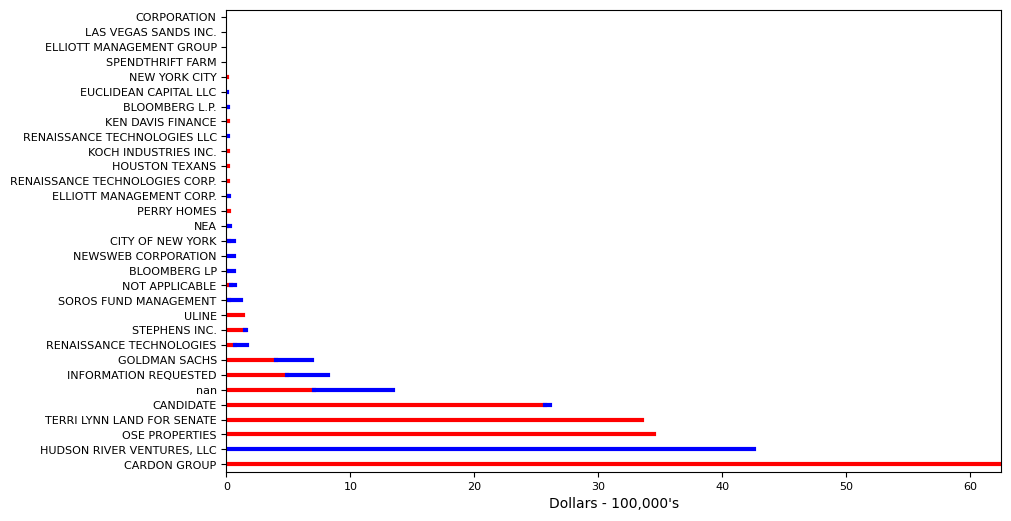

In [105]:
# رسم نمودار
plt.figure(figsize=(10, 6))
plt.xlim(0, mx)
plt.ylim(0.5, n + 0.5)
plt.xlabel("Dollars - 100,000's", fontsize=10)
plt.xticks(fontsize=8)

# رسم نام‌ها در محور y
plt.yticks(range(1, n+1), names, fontsize=8)

# رسم خطوط قرمز و آبی
for i in range(n):
    plt.plot([0, rep.iloc[i]], [i+1, i+1], color='red', linewidth=3)
    plt.plot([rep.iloc[i], rep.iloc[i] + dem.iloc[i]], [i+1, i+1], color='blue', linewidth=3)

plt.show()